In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs import *
from sparse_rf.modules import make_X, make_A
from sparse_rf.util import *
import sparse_rf.util.fns as fns 
import sparse_rf.util.polynomials as poly
from functools import partial
import random
import gc

import sys

In [18]:
ratio_train = 0.7
m = int(200 / ratio_train)
d = 3
q = 2
N = 3276
w_scale = 1/np.sqrt(q)
noise_scale = 0
n = N//comb(d, q)
active = fourier
fn = fns.fn21
# fn = lambda x: np.sin(x[0]) + np.cos(x[0])


n

1092

In [19]:
def make_W(d, q, n=1, dist=normal):
    num_supports = comb(d, q)
    W = np.zeros((n*num_supports, d))
    inds = combinations(range(d), d-q)
    ds = set(range(d))
    inds_track = []
    for i in range(num_supports):
        ind = next(inds)
        inds_track.append(ds.difference(set(ind)))
        for j in range(n):
            w = dist(d)
            w[list(ind)] = 0
            W[i*n+j, :] = w
    return W, inds_track

In [20]:
X = make_X(d, m, dist=partial(uniform, low=-np.pi, high=np.pi))
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

y = np.array(list(map(fn, X))) + np.random.randn(m) * noise_scale 
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [21]:
W, inds = make_W(d, q, n=n, dist=partial(normal, stdev=w_scale))
A_train = make_A(X_train, W, active=active) / np.sqrt(N)
A_test = make_A(X_test, W, active=active) / np.sqrt(N)
# K_train = make_K(X_train, kernel=partial(sparse_rbf, d=d, q=q,  scale=w_scale))
# K_test = make_K(X_train, X_test=X_test, kernel=partial(sparse_rbf, d=d, q=q, scale=w_scale))

In [22]:
c_l2 = min_l2(A_train, y_train)
np.linalg.norm(A_test@c_l2-y_test) / np.linalg.norm(y_test)

0.0028586481363248786

In [23]:
c_l1 = min_l1(A_train, y_train, eta=0)
np.linalg.norm(A_test@c_l1-y_test) / np.linalg.norm(y_test)

Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0


0.026690152002355097

In [94]:
# c_k = min_l2(K_train, y_train)
# np.linalg.norm(K_test@c_k-y_test) / np.linalg.norm(y_test)

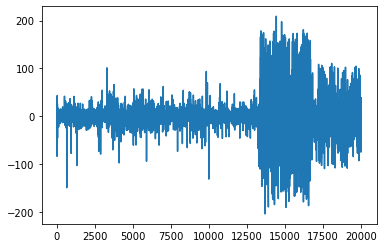

In [88]:
plt.plot(c_l2)
# if active == fourier:
#     for i in range(len(inds)):
#         plt.vlines((len(c_l2)//(2*len(inds)))*(i+1), min(c_l2), max(c_l2), color="black", linestyles="--")
#     for i in range(len(inds)):
#         plt.vlines((len(c_l2)//(2*len(inds)))*(i+len(inds)+1), min(c_l2), max(c_l2), color="red", linestyles="--")
# else:
#     for i in range(len(inds)):
#         plt.vlines((len(c_l2)//(len(inds)))*(i+1), min(c_l2), max(c_l2), color="black", linestyles="--")

In [55]:
inds

[{0, 1, 2}]